# Welcome to Projects in Programming & Data Science! 

---

# Laptop Setup

### NYU Classes

Make sure you are able to access our course page on NYU Classes. This is where I will be posting all of our course content (notebooks, datasets, et. cetera). This is also where all of your assignments will be posted, graded, and returned. 

### Colab

In order to standardize the way we all use Jupyter Notebook (described below) we are going to use Google's Colab (https://colab.research.google.com/notebooks/welcome.ipynb) 

Think of using Colab as renting a computer via your web browser (I recommend Chrome) that you can use. This is important because that means that in order to save your work, you need to download it from Colab onto your computer (machine) and re-upload it next time you'd like to work with it. 

For instance, if I want to open today's class notebook in Colab, I: 

<br>

1. **Will go to https://colab.research.google.com/notebooks/welcome.ipynb**

<div> 
    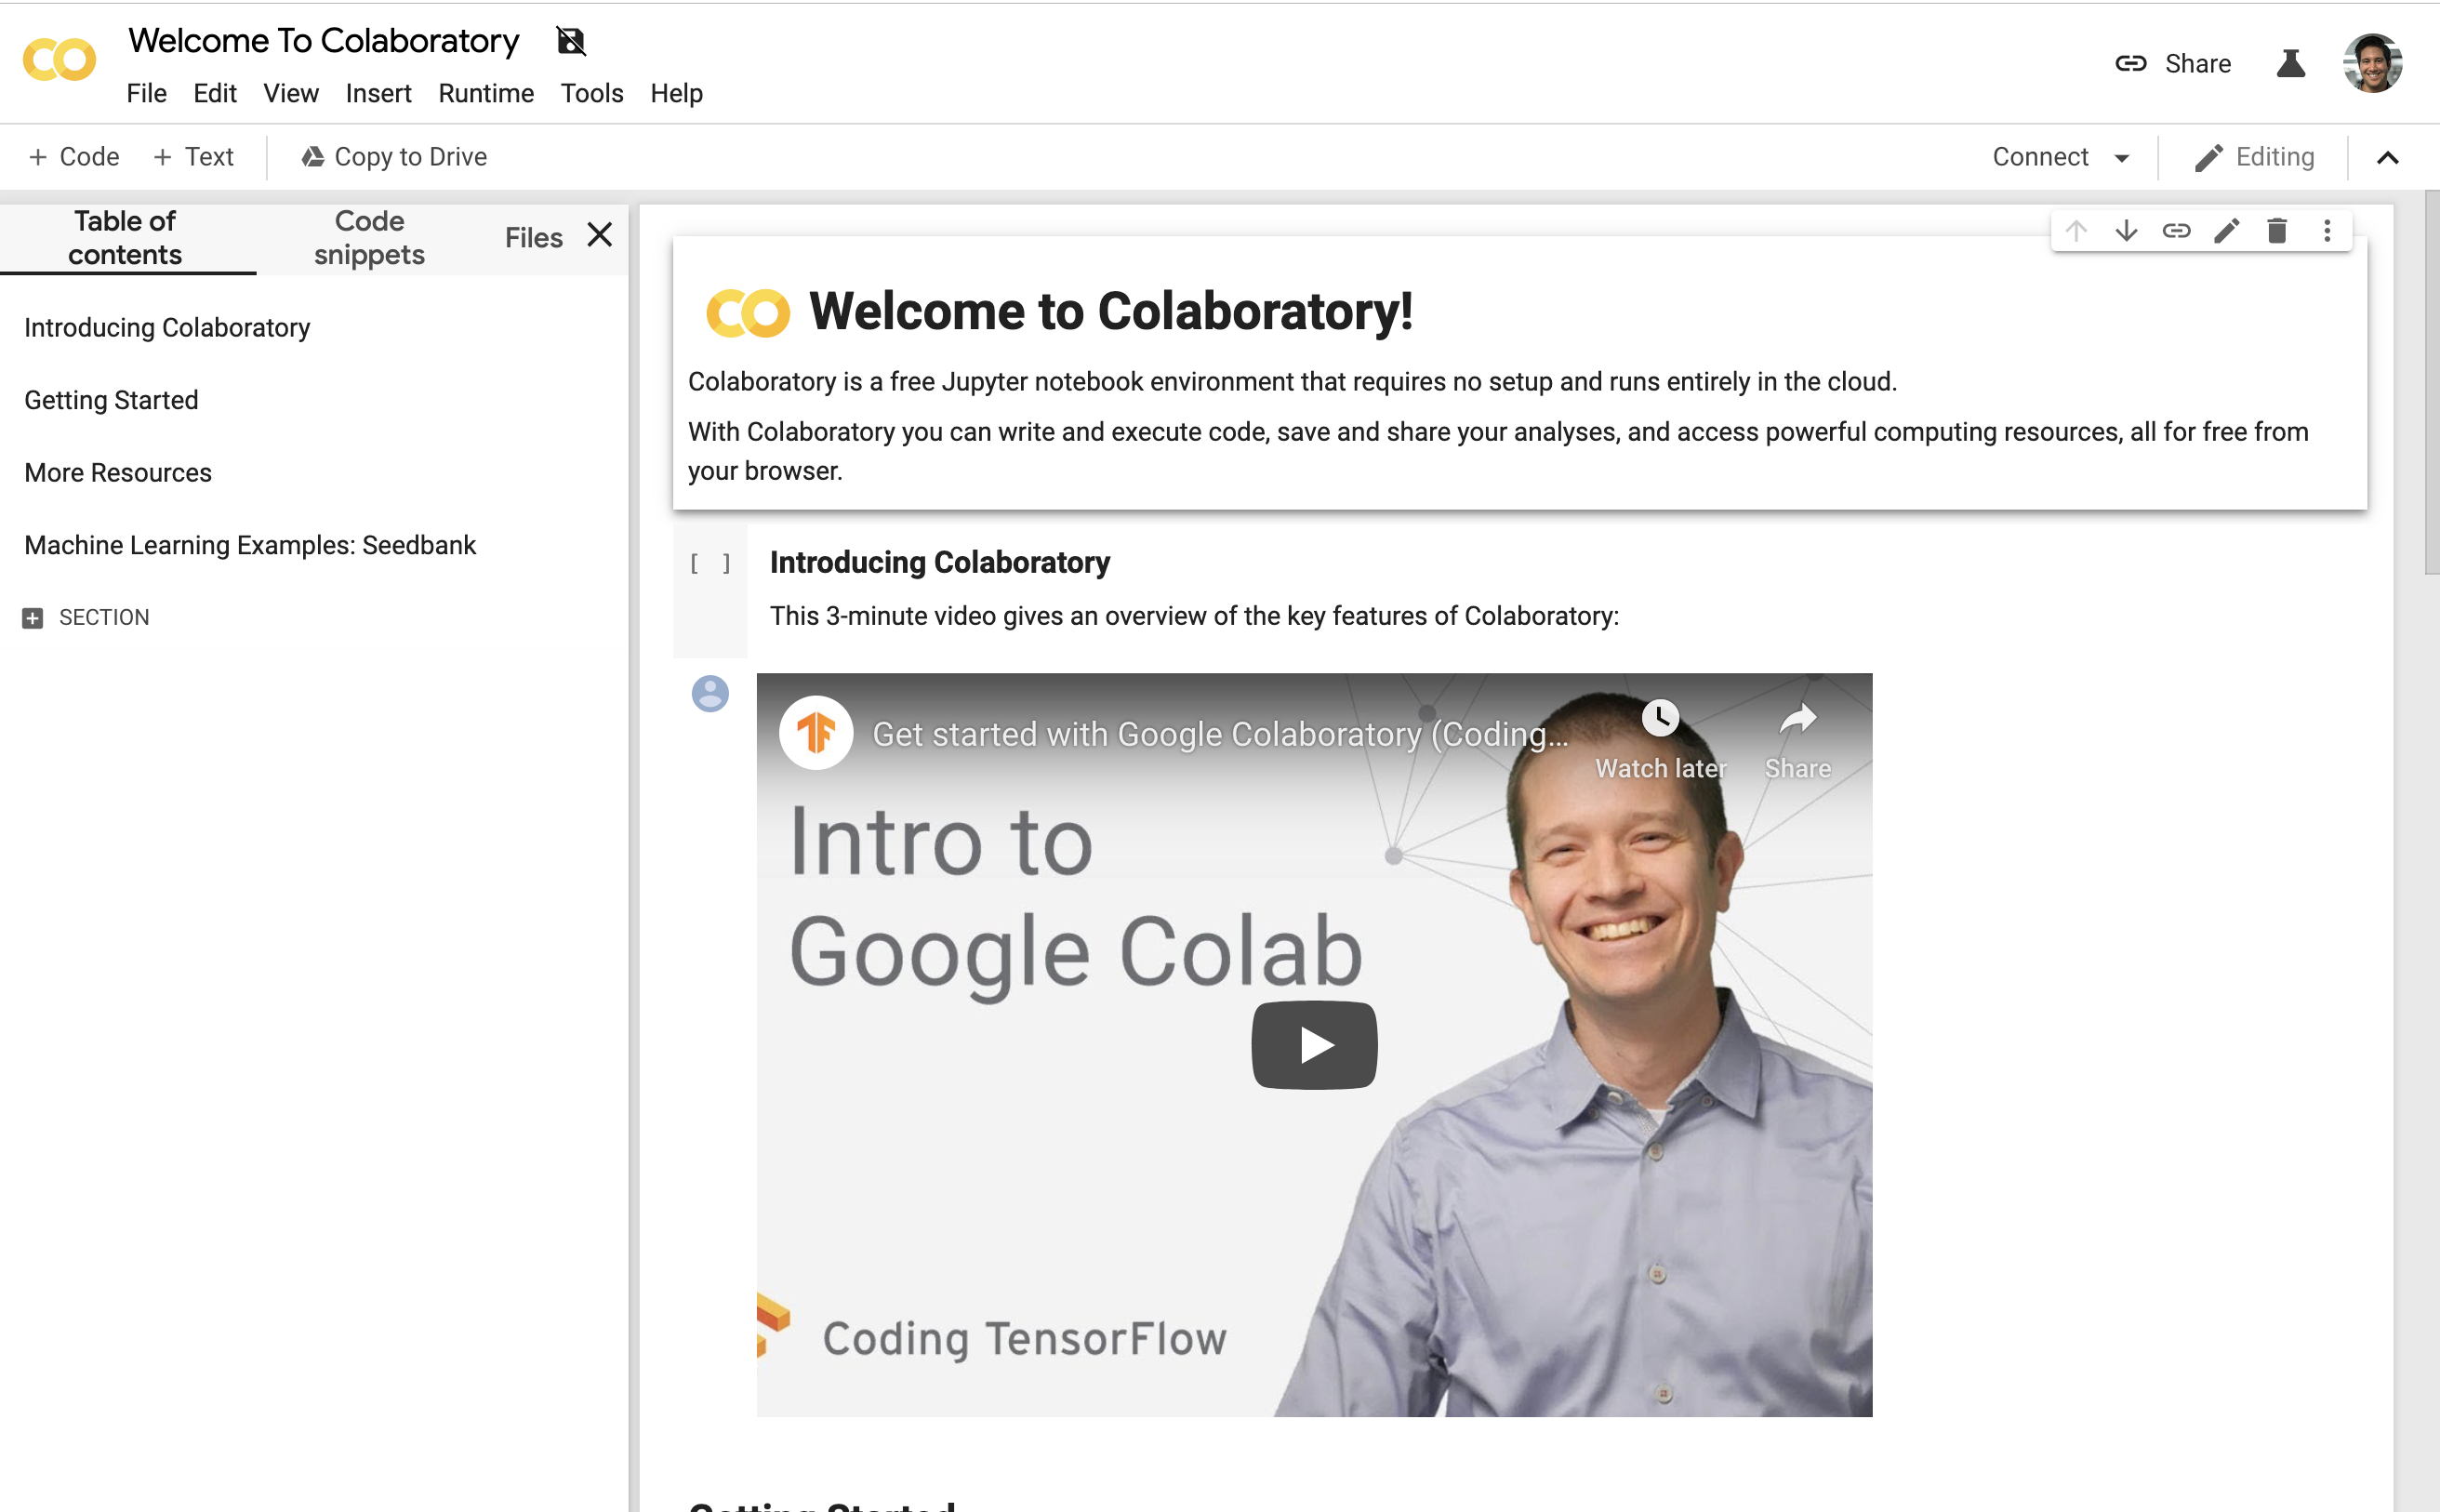
</div>

2. **Will click "file" > "upload notebook"** 

<div> 
    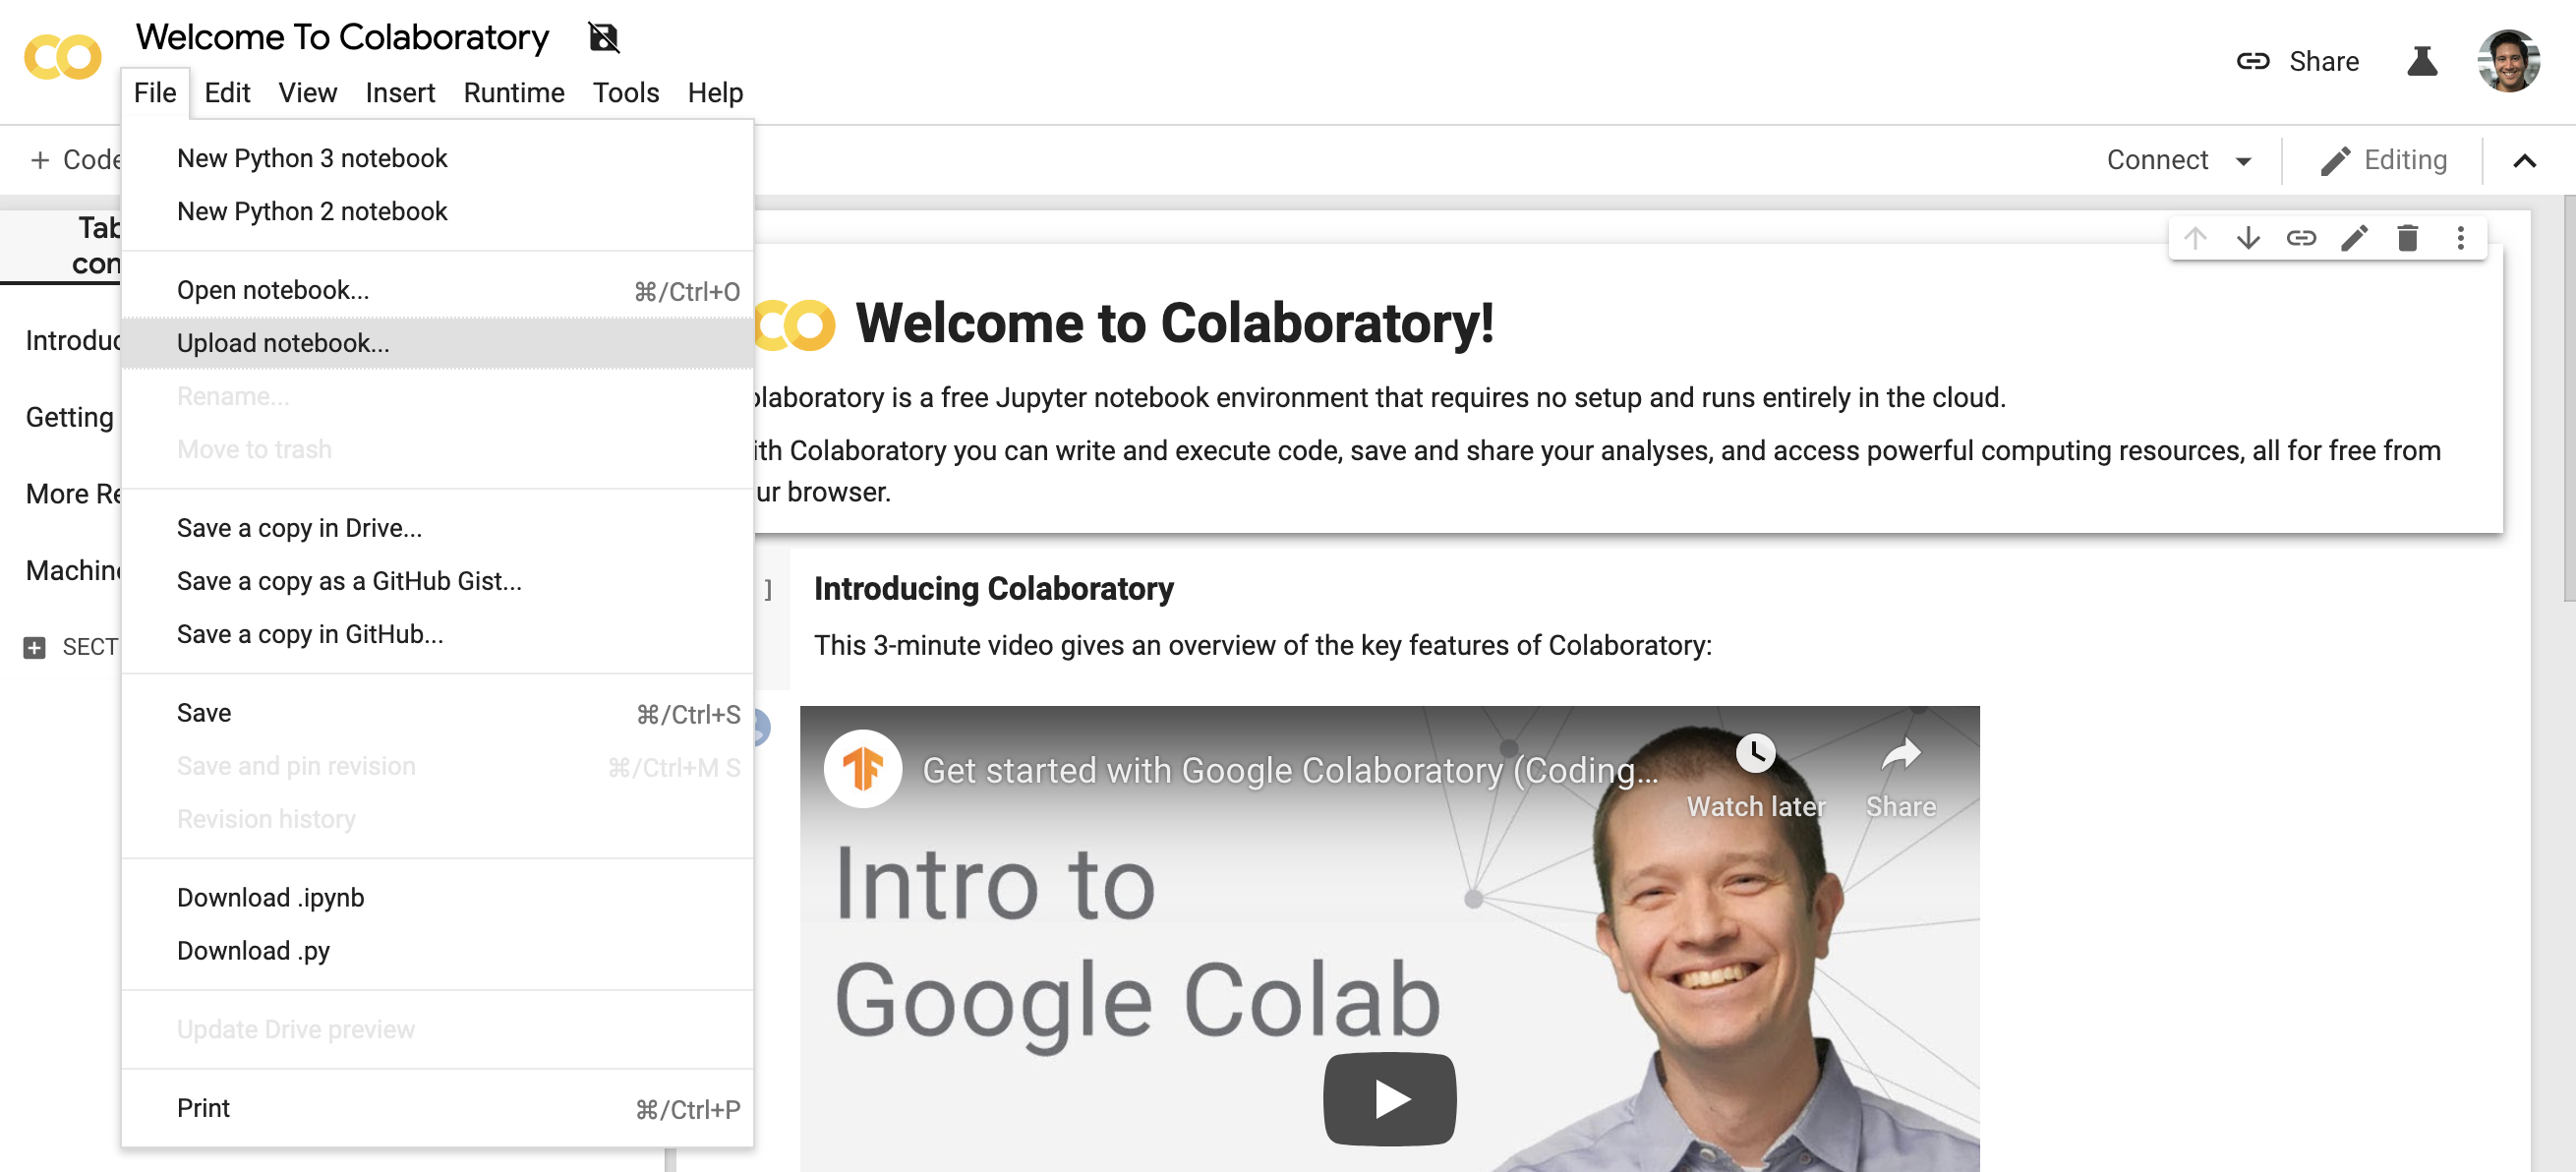
</div>

3. **Note that a Jupyter Notebook will always have a .ipynb extension. In Colab I can click "Upload" then "Choose File" and upload the notebook (that I have downloaded from NYU Classes) to Colab.**

<div> 
    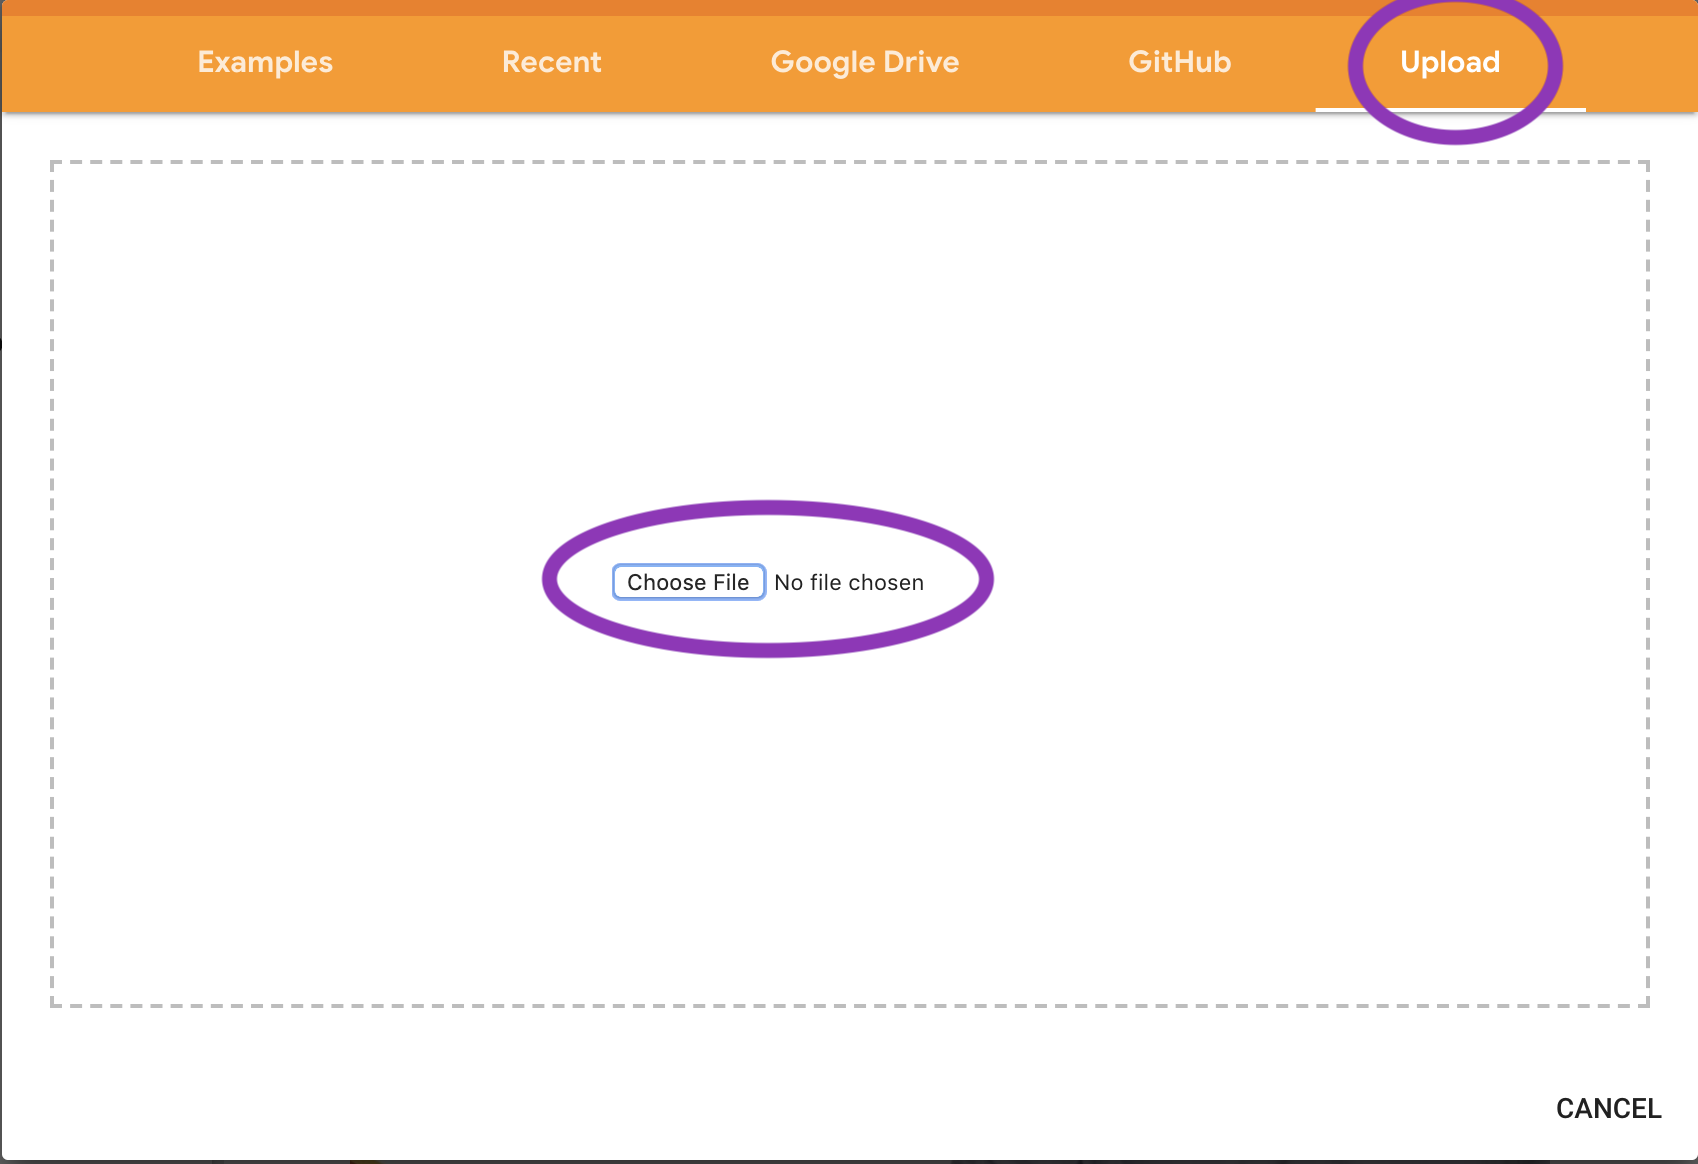
</div>

4. **Once I click "Open" ...**

<div> 
    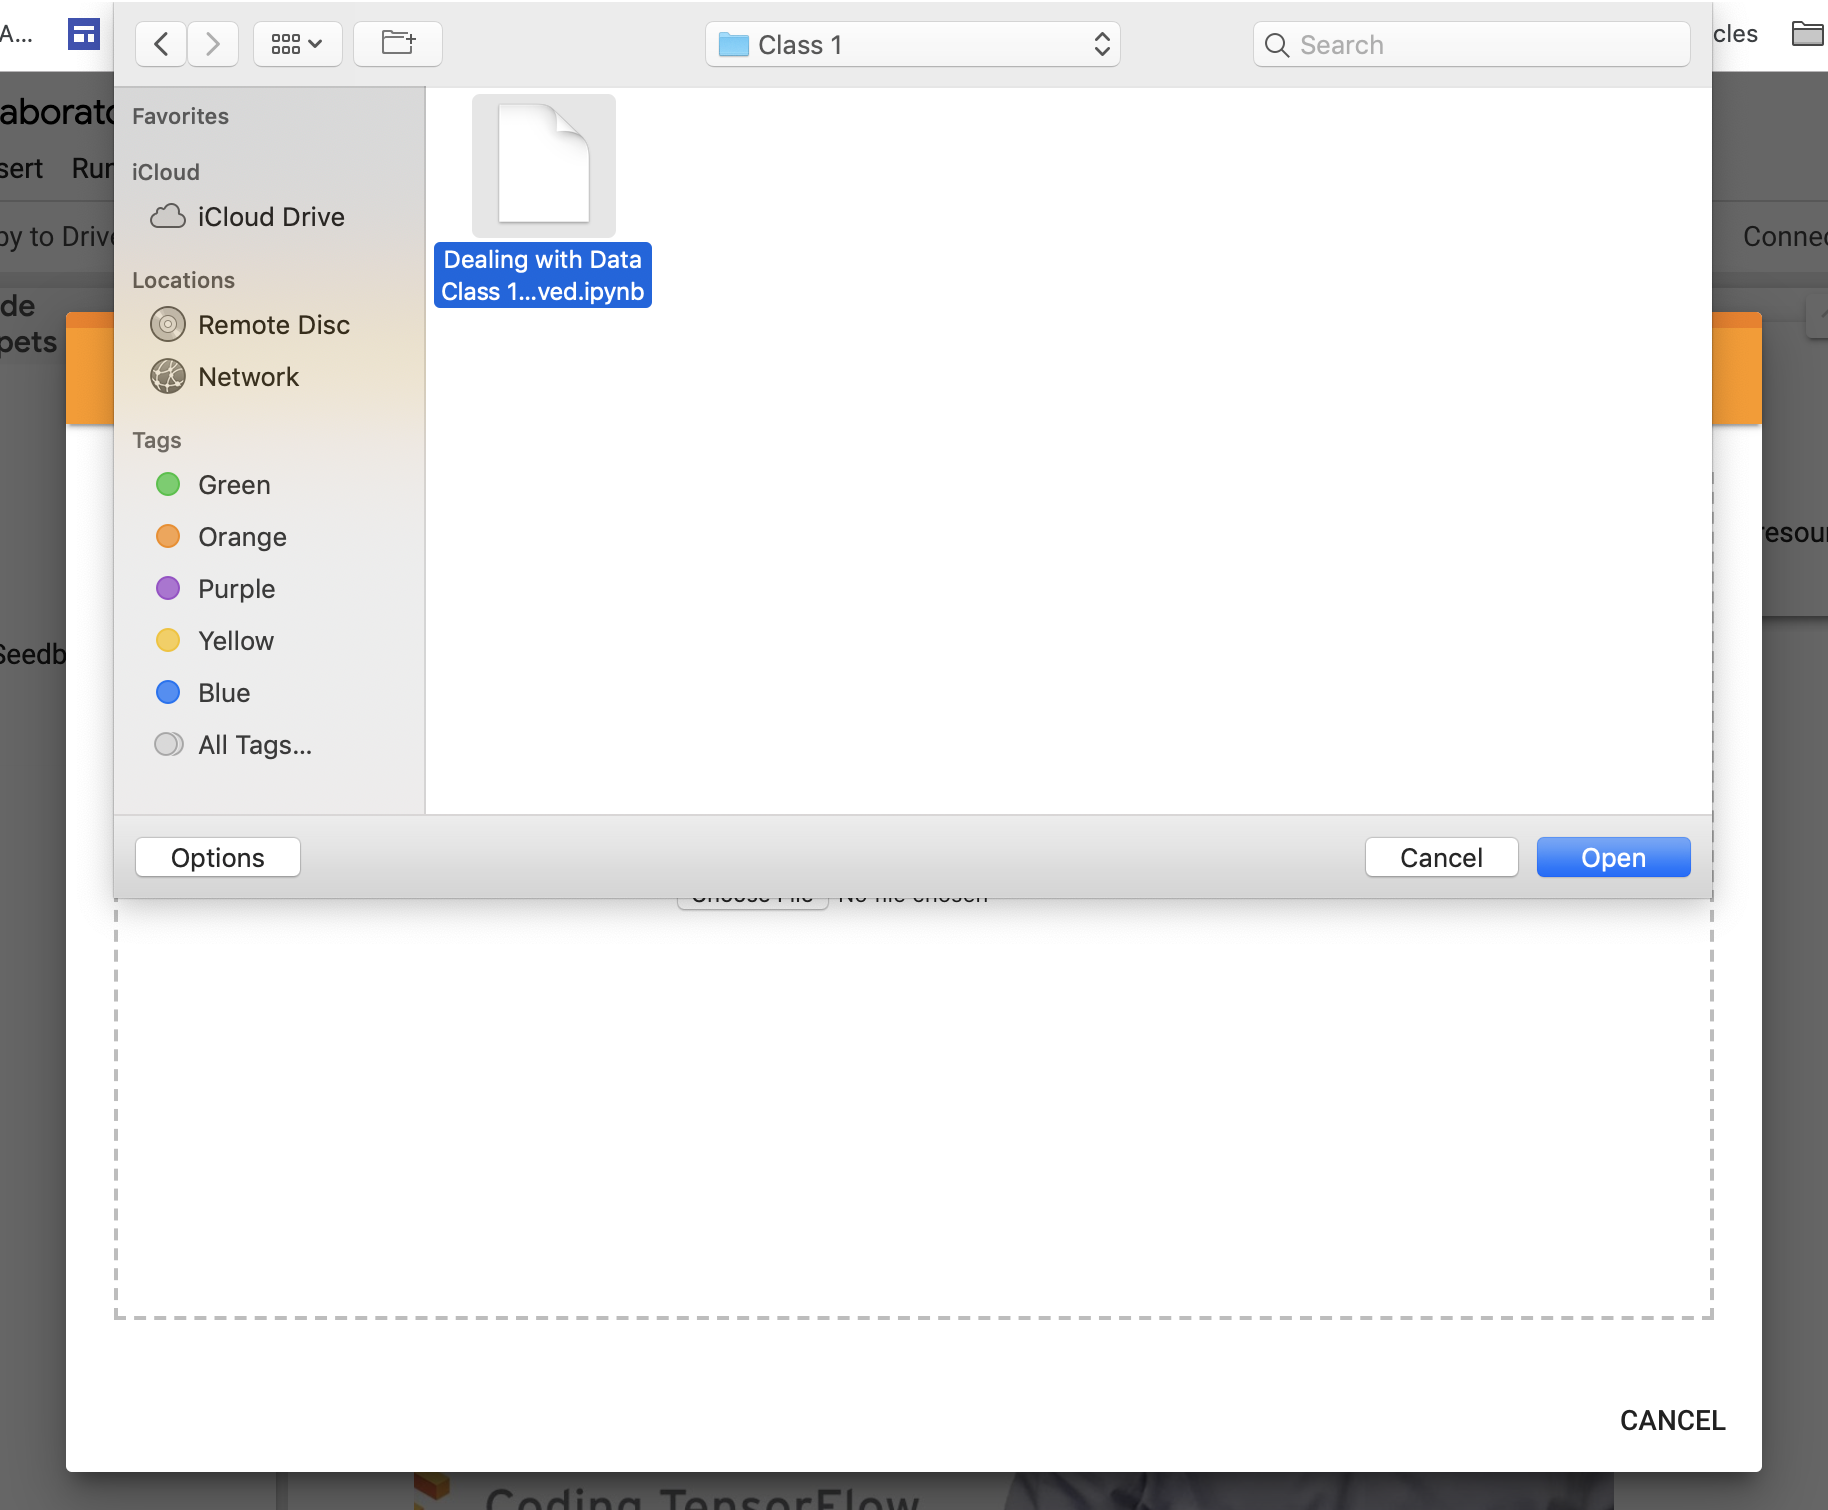
</div>

5. **Colab should open the notebook, and voila!**

<div> 
    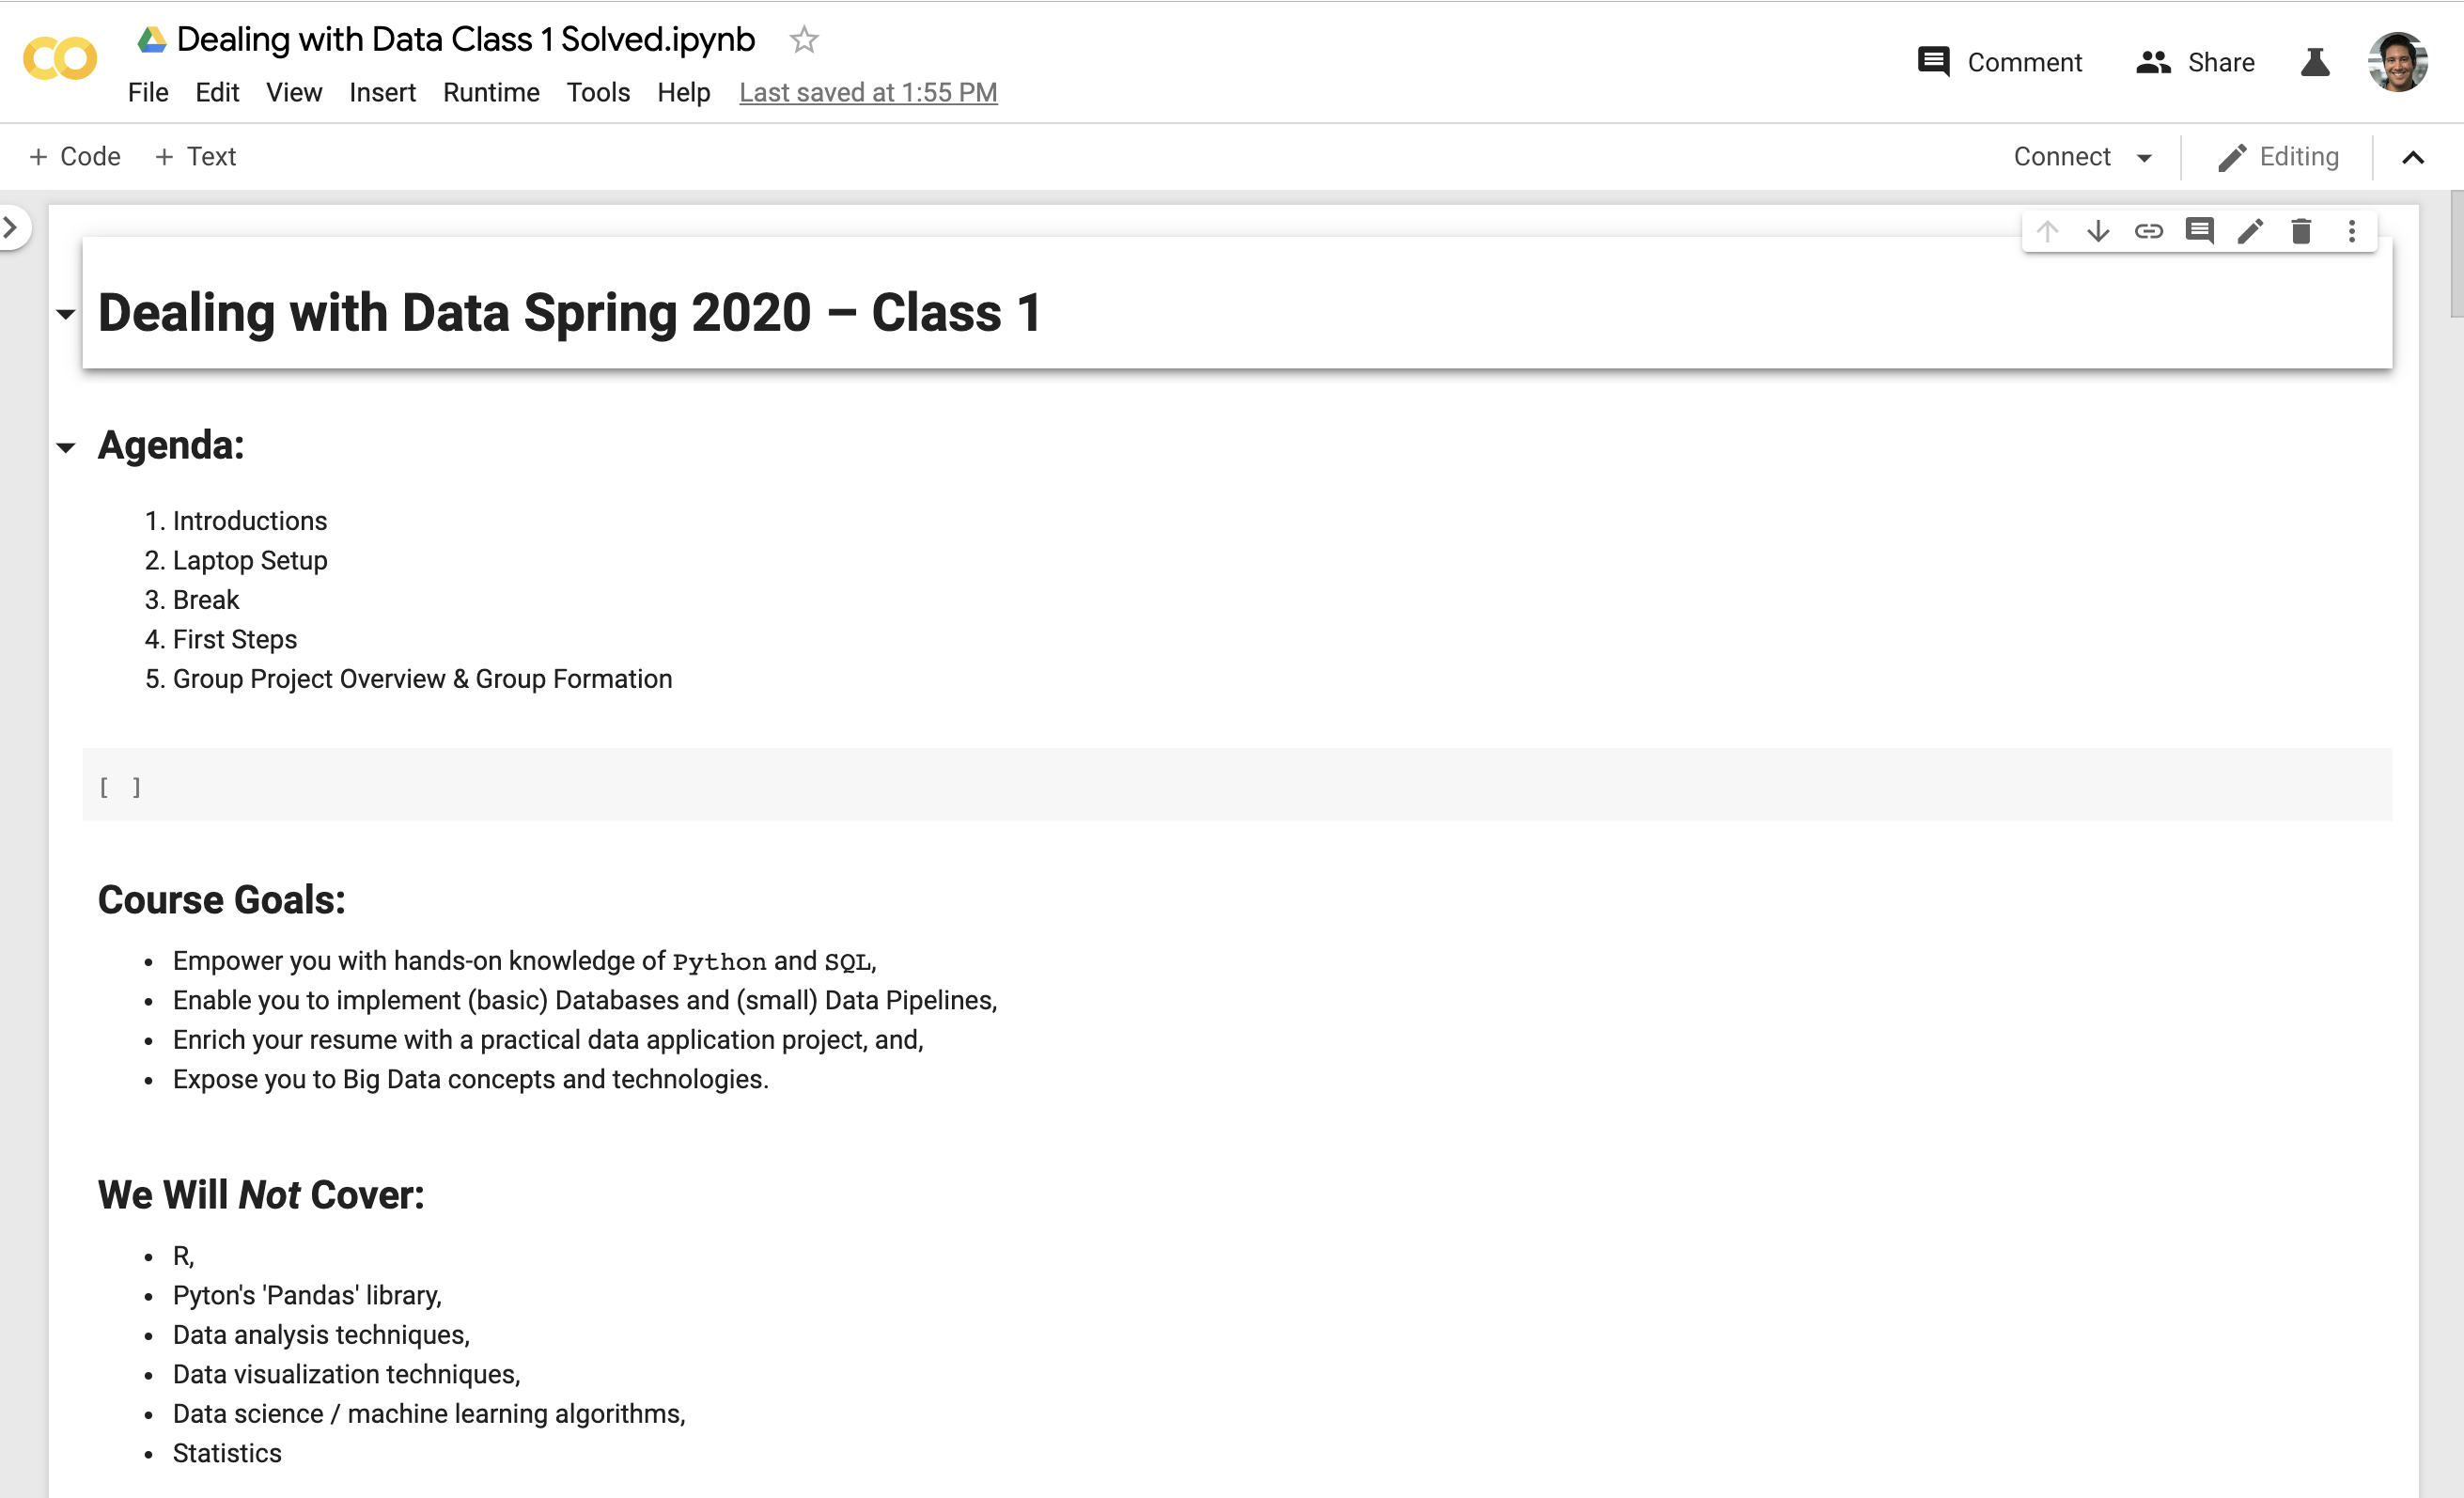
</div>

---

Today we're going to jump right in to the mix and leverage the CitiBike API to populate a sqlite database at regular intervals. Consider this your warm-up for the semester! 

In [1]:
import sqlite3

[SQLite](https://www.sqlite.org/index.html) is a library that allows us to create, populate, and call upon a SQL Database. It's also serverless, meaning we don't need to access a separate server where we're storing our data – instead, we can directly access our databse. We can even store that database as a file on our local machine and call upon it. 

In [2]:
con = sqlite3.connect('citibikeData.db') # this is how we are going to create our database, 
                                         # calling it 'citibikeData.db'

# "con" stands for "connection" – this is telling SQLite what database to use

Now, let's check out the API we'll be working with: https://streamdata.io/developers/api-gallery/new-york-citibike-api/

---

First, we'll request the json from the CitiBike API URL and just print it out to get a quick glimpse

In [3]:
import json 
import urllib.request # https://docs.python.org/3/library/urllib.request.html

with urllib.request.urlopen("https://feeds.citibikenyc.com/stations/stations.json") as url:
    data = json.loads(url.read().decode())
    print(data)

{'executionTime': '2019-10-25 01:48:27 PM', 'stationBeanList': [{'id': 237, 'stationName': 'E 11 St & 2 Ave', 'availableDocks': 10, 'totalDocks': 39, 'latitude': 40.73047309, 'longitude': -73.98672378, 'statusValue': 'In Service', 'statusKey': 1, 'availableBikes': 28, 'stAddress1': 'E 11 St & 2 Ave', 'stAddress2': '', 'city': '', 'postalCode': '', 'location': '', 'altitude': '', 'testStation': False, 'lastCommunicationTime': '2019-10-25 01:48:14 PM', 'landMark': ''}, {'id': 281, 'stationName': 'Grand Army Plaza & Central Park S', 'availableDocks': 23, 'totalDocks': 66, 'latitude': 40.7643971, 'longitude': -73.97371465, 'statusValue': 'In Service', 'statusKey': 1, 'availableBikes': 37, 'stAddress1': 'Grand Army Plaza & Central Park S', 'stAddress2': '', 'city': '', 'postalCode': '', 'location': '', 'altitude': '', 'testStation': False, 'lastCommunicationTime': '2019-10-25 01:46:08 PM', 'landMark': ''}, {'id': 304, 'stationName': 'Broadway & Battery Pl', 'availableDocks': 33, 'totalDocks

As you can see, the json is a dictionary of lists and other dictionaries containing information about CitiBike stations across New York City. 

For our purposes we're interested in the information contained within the 'stationBeanList' list, seen in the first line of the json above:

In [5]:
stations = data['stationBeanList'] # iterate through the json to find the station data of interest

In [6]:
import pandas as pd # we'll use pandas just to visualize our data, NOT to query it

df_stations = pd.DataFrame(stations) # create a new dataframe called 'df_stations' 
df_stations.head() # check the first five station entries

,id,stationName,availableDocks,totalDocks,latitude,longitude,statusValue,statusKey,availableBikes,stAddress1,stAddress2,city,postalCode,location,altitude,testStation,lastCommunicationTime,landMark
0,237,E 11 St & 2 Ave,10,39,40.730473,-73.986724,In Service,1,28,E 11 St & 2 Ave,,,,,,False,2019-10-25 01:48:14 PM,
1,281,Grand Army Plaza & Central Park S,23,66,40.764397,-73.973715,In Service,1,37,Grand Army Plaza & Central Park S,,,,,,False,2019-10-25 01:46:08 PM,
2,304,Broadway & Battery Pl,33,33,40.704633,-74.013617,In Service,1,0,Broadway & Battery Pl,,,,,,False,2019-10-25 01:47:27 PM,
3,305,E 58 St & 3 Ave,30,33,40.760958,-73.967245,In Service,1,2,E 58 St & 3 Ave,,,,,,False,2019-10-25 01:46:48 PM,
4,337,Old Slip & Front St,30,37,40.703799,-74.008387,In Service,1,6,Old Slip & Front St,,,,,,False,2019-10-25 01:47:51 PM,


So, we have our data from the CitiBike feed, and it looks pretty good! Now we need to create a table within our database (the one we named citibikeData.db). We do that using the 'CREATE TABLE IF NOT EXISTS' statement seen below. 

In that statement, the 'IF NOT EXISTS' makes clear that we are going to create the table called 'StationsData' only once. That way, if we run that cell again, it's not going to overwrite the work we've previously done. 

Note that at this point we aren't adding any data to our table. All we're doing is telling SQLite that we want to create a new table, and providing it with a) the column names and b) the data type those columns should be expecting.

In [7]:
sql = "CREATE TABLE IF NOT EXISTS StationsData (station_id int, stationName varchar(250), availableDocks int, totalDocks int, latitude float, longitude float, statusValue varchar(250), statusKey int, availableBikes int, stAddress1 varchar(250), stAddress2 varchar(250), city varchar(250), postalCode varchar(250), location varchar(250), altitude varchar(250), testStation bool, lastCommunicationTime date, landMark varchar(250));" 

con.execute(sql)
con.commit()

Now that we have our database and our table, we want to insert our data. 

Below, we create a "query template" where we "INSERT OR IGNORE INTO" our table (StationsData) the values associated with each of our columns. 

We define those values by parsing through the CitiBike json we got earlier, and for each "row" of that json, we create a new row in our SQLite table. 

In [8]:
query_template = """INSERT OR IGNORE INTO StationsData(station_id, stationName, availableDocks, totalDocks, latitude, \
longitude, statusValue, statusKey, availableBikes, stAddress1, stAddress2, city, postalCode, location, altitude, \
testStation, lastCommunicationTime, landMark) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);"""

for entry in stations: # for every station entry in the json 
    station_id = int(entry['id']) # find and set station_id
    stationName = str(entry['stationName'])
    availableDocks = int(entry['availableDocks'])
    totalDocks = int(entry['totalDocks'])
    latitude = str(entry['latitude'])
    longitude = str(entry['longitude'])
    statusValue = str(entry['statusValue'])
    statusKey = int(entry['statusKey'])
    availableBikes = int(entry['availableBikes'])
    stAddress1 = str(entry['stAddress1'])
    stAddress2 = str(entry['stAddress2'])
    city = str(entry['city'])
    postalCode = str(entry['postalCode'])
    location = str(entry['location'])
    altitude = str(entry['altitude'])
    testStation = bool(entry['testStation'])
    lastCommunicationTime = entry['lastCommunicationTime']
    landMark = str(entry['landMark'])
                           
    print("Inserting Station:", station_id, stationName, availableDocks, totalDocks, latitude, longitude, statusValue, statusKey, availableBikes, stAddress1, stAddress2, city, postalCode, location, altitude, testStation, lastCommunicationTime, landMark) 
    
    query_parameters = (station_id, stationName, availableDocks, totalDocks, latitude, longitude, statusValue, statusKey, availableBikes, stAddress1, stAddress2, city, postalCode, location, altitude, testStation, lastCommunicationTime, landMark) 
    
    con.execute(query_template, query_parameters)
    
con.commit()

Inserting Station: 237 E 11 St & 2 Ave 10 39 40.73047309 -73.98672378 In Service 1 28 E 11 St & 2 Ave      False 2019-10-25 01:48:14 PM 
Inserting Station: 281 Grand Army Plaza & Central Park S 23 66 40.7643971 -73.97371465 In Service 1 37 Grand Army Plaza & Central Park S      False 2019-10-25 01:46:08 PM 
Inserting Station: 304 Broadway & Battery Pl 33 33 40.70463334 -74.01361706 In Service 1 0 Broadway & Battery Pl      False 2019-10-25 01:47:27 PM 
Inserting Station: 305 E 58 St & 3 Ave 30 33 40.76095756 -73.96724467 In Service 1 2 E 58 St & 3 Ave      False 2019-10-25 01:46:48 PM 
Inserting Station: 337 Old Slip & Front St 30 37 40.7037992 -74.00838676 In Service 1 6 Old Slip & Front St      False 2019-10-25 01:47:51 PM 
Inserting Station: 347 Greenwich St & W Houston St 35 35 40.728846 -74.008591 In Service 1 0 Greenwich St & W Houston St      False 2019-10-25 01:47:55 PM 
Inserting Station: 359 E 47 St & Park Ave 45 64 40.75510267 -73.97498696 In Service 1 18 E 47 St & Park Ave 

Inserting Station: 336 Sullivan St & Washington Sq 0 36 40.73047747 -73.99906065 In Service 1 35 Sullivan St & Washington Sq      False 2019-10-25 01:45:44 PM 
Inserting Station: 339 Avenue D & E 12 St 27 30 40.72580614 -73.97422494 In Service 1 3 Avenue D & E 12 St      False 2019-10-25 01:46:08 PM 
Inserting Station: 340 Madison St & Clinton St 26 27 40.71269042 -73.98776323 In Service 1 0 Madison St & Clinton St      False 2019-10-25 01:47:56 PM 
Inserting Station: 341 Stanton St & Mangin St 12 19 40.71782143 -73.97628939 In Service 1 4 Stanton St & Mangin St      False 2019-10-25 01:45:23 PM 
Inserting Station: 342 Columbia St & Rivington St 29 29 40.71739973 -73.98016555 In Service 1 0 Columbia St & Rivington St      False 2019-10-25 01:46:36 PM 
Inserting Station: 343 Clinton Ave & Flushing Ave 2 23 40.69794 -73.96986848 In Service 1 20 Clinton Ave & Flushing Ave      False 2019-10-25 01:46:58 PM 
Inserting Station: 344 Monroe St & Bedford Ave 23 23 40.6851443 -73.95380904 In Ser

Inserting Station: 545 E 23 St & 1 Ave 21 27 40.736502 -73.97809472 In Service 1 4 E 23 St & 1 Ave      False 2019-10-25 01:45:09 PM 
Inserting Station: 546 E 30 St & Park Ave S 9 45 40.74444921 -73.98303529 In Service 1 33 E 30 St & Park Ave S      False 2019-10-25 01:44:30 PM 
Inserting Station: 2000 Front St & Washington St 2 30 40.70255088 -73.98940236 In Service 1 28 Front St & Washington St      False 2019-10-25 01:48:25 PM 
Inserting Station: 2002 Wythe Ave & Metropolitan Ave 9 27 40.716887 -73.963198 In Service 1 16 Wythe Ave & Metropolitan Ave      False 2019-10-25 01:47:08 PM 
Inserting Station: 2003 1 Ave & E 18 St 47 54 40.733812191966315 -73.98054420948029 In Service 1 5 1 Ave & E 18 St      False 2019-10-25 01:47:54 PM 
Inserting Station: 2005 Railroad Ave & Kay Ave 3 12 40.70531194 -73.97100056 In Service 1 8 Railroad Ave & Kay Ave      False 2019-10-25 01:46:24 PM 
Inserting Station: 2006 Central Park S & 6 Ave 38 49 40.76590936 -73.97634151 In Service 1 9 Central Park 

Inserting Station: 3196 Riverview Park 9 18 40.7443187 -74.0439909 In Service 1 9 Riverview Park      False 2019-10-25 01:46:27 PM 
Inserting Station: 3198 Heights Elevator 11 18 40.748715945380226 -74.04044330120087 In Service 1 7 Heights Elevator      False 2019-10-25 01:47:21 PM 
Inserting Station: 3199 Newport Pkwy 7 14 40.7287448 -74.0321082 In Service 1 6 Newport Pkwy      False 2019-10-25 01:47:52 PM 
Inserting Station: 3201 Dey St 14 18 40.737711 -74.066921 In Service 1 4 Dey St      False 2019-10-25 01:47:14 PM 
Inserting Station: 3202 Newport PATH 0 18 40.7272235 -74.0337589 In Service 1 17 Newport PATH      False 2019-10-25 01:47:40 PM 
Inserting Station: 3203 Hamilton Park 15 26 40.727595966 -74.044247311 In Service 1 11 Hamilton Park      False 2019-10-25 01:45:23 PM 
Inserting Station: 3205 JC Medical Center 20 22 40.71653978099194 -74.0496379137039 In Service 1 2 JC Medical Center      False 2019-10-25 01:46:07 PM 
Inserting Station: 3206 Hilltop 26 26 40.7311689 -74.057

Inserting Station: 3383 Cathedral Pkwy & Broadway 25 25 40.804213 -73.96699104 In Service 1 0 Cathedral Pkwy & Broadway      False 2019-10-25 01:47:38 PM 
Inserting Station: 3384 Smith St & 3 St 22 25 40.6787242 -73.99599099 In Service 1 3 Smith St & 3 St      False 2019-10-25 01:46:24 PM 
Inserting Station: 3386 1 Pl & Clinton St 26 27 40.6809591 -73.99905709 In Service 1 1 1 Pl & Clinton St      False 2019-10-25 01:46:07 PM 
Inserting Station: 3387 E 106 St & Madison Ave 1 25 40.7934337 -73.94945003 In Service 1 24 E 106 St & Madison Ave      False 2019-10-25 01:46:00 PM 
Inserting Station: 3388 President St & Henry St 24 25 40.6828003 -73.99990419 In Service 1 0 President St & Henry St      False 2019-10-25 01:46:12 PM 
Inserting Station: 3389 Carroll St & Columbia St 21 28 40.6830456 -74.00348559 In Service 1 7 Carroll St & Columbia St      False 2019-10-25 01:45:38 PM 
Inserting Station: 3390 E 109 St & 3 Ave 4 24 40.79329668 -73.9432083 In Service 1 20 E 109 St & 3 Ave      False

Inserting Station: 3560 28 St & 38 Ave 0 0 40.754876 -73.934326 Not In Service 3 0 28 St & 38 Ave      False 2019-10-15 10:53:41 AM 
Inserting Station: 3561 37 Ave & 35 St 2 26 40.7531106 -73.9279917 In Service 1 24 37 Ave & 35 St      False 2019-10-25 01:44:44 PM 
Inserting Station: 3562 Classon Ave & St Marks Ave 25 27 40.6765198 -73.9596082 In Service 1 2 Classon Ave & St Marks Ave      False 2019-10-25 01:47:26 PM 
Inserting Station: 3563 28 St & 36 Ave 9 29 40.757186 -73.932719 In Service 1 20 28 St & 36 Ave      False 2019-10-25 01:46:19 PM 
Inserting Station: 3564 21 St & 36 Ave 12 19 40.7601853 -73.9362726 In Service 1 7 21 St & 36 Ave      False 2019-10-25 01:48:26 PM 
Inserting Station: 3565 36 Ave & 10 St 7 19 40.7614376 -73.9411265 In Service 1 12 36 Ave & 10 St      False 2019-10-25 01:48:07 PM 
Inserting Station: 3566 Crescent St & 35 Ave 23 25 40.7596276 -73.9321455 In Service 1 2 Crescent St & 35 Ave      False 2019-10-25 01:47:55 PM 
Inserting Station: 3567 11 St & 35 

Inserting Station: 3770 Central Ave & Flushing Ave 19 21 40.702831 -73.9333 In Service 1 2 Central Ave & Flushing Ave      False 2019-10-25 01:46:49 PM 
Inserting Station: 3771 McKibbin St & Bogart St 3 30 40.706237 -73.933871 In Service 1 26 McKibbin St & Bogart St      False 2019-10-25 01:48:07 PM 
Inserting Station: 3772 Devoe St & Morgan Ave 18 19 40.713811 -73.93515 In Service 1 1 Devoe St & Morgan Ave      False 2019-10-25 01:45:42 PM 
Inserting Station: 3773 Knickerbocker Ave & Thames St 17 20 40.70539 -73.92976 In Service 1 3 Knickerbocker Ave & Thames St      False 2019-10-25 01:47:45 PM 
Inserting Station: 3774 Knickerbocker Ave & George St 18 23 40.704425 -73.92836 In Service 1 4 Knickerbocker Ave & George St      False 2019-10-25 01:48:00 PM 
Inserting Station: 3775 Suydam St & Knickerbocker Ave 25 27 40.702013 -73.923769 In Service 1 2 Suydam St & Knickerbocker Ave      False 2019-10-25 01:48:04 PM 
Inserting Station: 3776 Central Ave & Starr Street 23 23 40.700003 -73.928

Now, we can use [pd.read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html) to check that we are properly connected to our database, and the StationsData table within that database:

In [9]:
check = pd.read_sql("SELECT * FROM StationsData LIMIT 5", con=con)
check

,station_id,stationName,availableDocks,totalDocks,latitude,longitude,statusValue,statusKey,availableBikes,stAddress1,stAddress2,city,postalCode,location,altitude,testStation,lastCommunicationTime,landMark
0,168,W 18 St & 6 Ave,35,47,40.739713,-73.994564,In Service,1,11,W 18 St & 6 Ave,,,,,,0,2019-09-06 03:34:46 PM,
1,281,Grand Army Plaza & Central Park S,46,66,40.764397,-73.973715,In Service,1,18,Grand Army Plaza & Central Park S,,,,,,0,2019-09-06 03:32:58 PM,
2,285,Broadway & E 14 St,39,53,40.734546,-73.990741,In Service,1,13,Broadway & E 14 St,,,,,,0,2019-09-06 03:33:18 PM,
3,298,3 Ave & Schermerhorn St,27,35,40.686832,-73.979677,In Service,1,6,3 Ave & Schermerhorn St,,,,,,0,2019-09-06 03:34:52 PM,
4,304,Broadway & Battery Pl,28,33,40.704633,-74.013617,In Service,1,5,Broadway & Battery Pl,,,,,,0,2019-09-06 03:35:23 PM,


Looks good! Last but not least, let's set things up so that our database automatically updates every 15 seconds. 

In [ ]:
import time 
import json 
import urllib.request
from datetime import datetime

while True:
    
    with urllib.request.urlopen("https://feeds.citibikenyc.com/stations/stations.json") as url:
        data = json.loads(url.read().decode())

    stations = data['stationBeanList'] # iterate through the json to find the station data

    con = sqlite3.connect('citibikeData.db') # connect to our db

    query_template = """INSERT OR IGNORE INTO StationsData(station_id, stationName, availableDocks, totalDocks, latitude, \
    longitude, statusValue, statusKey, availableBikes, stAddress1, stAddress2, city, postalCode, location, altitude, \
    testStation, lastCommunicationTime, landMark) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);"""

    for entry in stations: # for every station entry in the json 
        station_id = int(entry['id']) # find and set station_id
        stationName = str(entry['stationName'])
        availableDocks = int(entry['availableDocks'])
        totalDocks = int(entry['totalDocks'])
        latitude = str(entry['latitude'])
        longitude = str(entry['longitude'])
        statusValue = str(entry['statusValue'])
        statusKey = int(entry['statusKey'])
        availableBikes = int(entry['availableBikes'])
        stAddress1 = str(entry['stAddress1'])
        stAddress2 = str(entry['stAddress2'])
        city = str(entry['city'])
        postalCode = str(entry['postalCode'])
        location = str(entry['location'])
        altitude = str(entry['altitude'])
        testStation = bool(entry['testStation'])
        lastCommunicationTime = entry['lastCommunicationTime']
        landMark = str(entry['landMark'])
                           
        print("Inserting Station:", station_id, stationName, availableDocks, totalDocks, latitude, longitude, statusValue, statusKey, availableBikes, stAddress1, stAddress2, city, postalCode, location, altitude, testStation, lastCommunicationTime, landMark) 
        query_parameters = (station_id, stationName, availableDocks, totalDocks, latitude, longitude, statusValue, statusKey, availableBikes, stAddress1, stAddress2, city, postalCode, location, altitude, testStation, lastCommunicationTime, landMark) 
       
        con.execute(query_template, query_parameters)
    
    con.commit()
        
    time.sleep(15)

---

I hope this has helped you find your programming legs! Next week we'll get back to descriptive analytics using Python and Pandas. For now, take time to refresh yourself on the content covered in "Introduction to Programming". 

If you need a referesher on your SQL skills, check out the "Supplementary Info" directory in the class repo.